In [25]:
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras.models import Model
from keras import Sequential
from keras.layers import Dense
from keras.layers import Flatten

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os

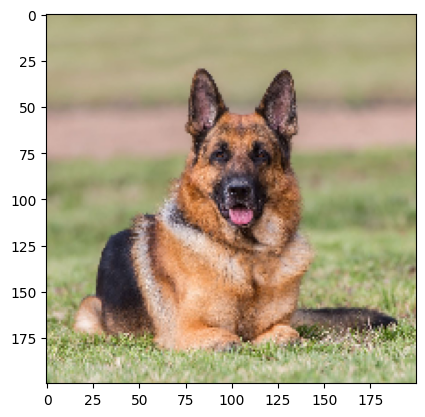

In [ ]:
plt.imshow(image.load_img("/content/dog.jpeg",target_size=(200,200)))
plt.show()

In [ ]:
data_gen=ImageDataGenerator(rotation_range=30,
                            width_shift_range=0.2,
                            height_shift_range=0.2,
                            shear_range=0.2,
                            zoom_range=0.2,
                            horizontal_flip=True,
                            fill_mode="constant"
                            )

In [ ]:
img=image.img_to_array(image.load_img("/content/dog.jpeg",target_size=(200,200)))

In [ ]:
input_batch=img.reshape((1,)+img.shape)

In [ ]:
i=0
for batch in data_gen.flow(input_batch,batch_size=1,save_to_dir="/content/sample_data/Data_Agumentation"):
  i+=1
  if i>3:
    break

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


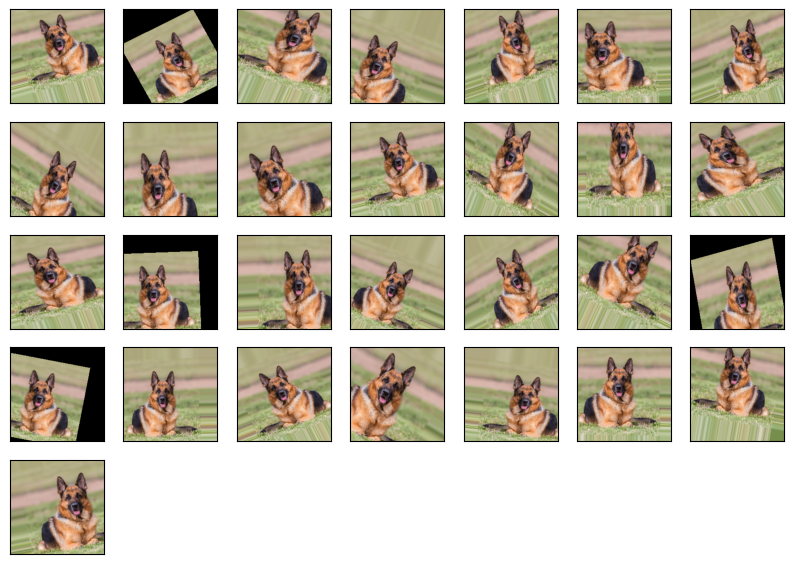

In [ ]:
plt.figure(figsize=(10,10))
for i,j in enumerate(os.listdir("/content/sample_data/Data_Agumentation")):
  plt.subplot(7,7,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(image.load_img("/content/sample_data/Data_Agumentation/"+str(j)))
plt.show()

In [9]:
from tensorflow import keras
from keras.models import Model

In [10]:
from keras.layers import *

In [13]:
x=Input(shape=(3,))
hiden_1=Dense(128,activation="relu")(x)
hiden_2=Dense(64,activation="relu")(hiden_1)
output_1=Dense(1,activation="linear")(hiden_2)
output_2=Dense(1,activation="sigmoid")(hiden_2)
model=Model(inputs=x,outputs=[output_1,output_2])

In [11]:
from keras.utils import plot_model

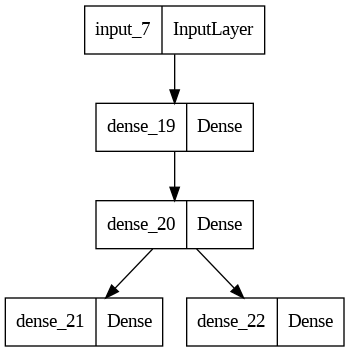

In [14]:
plot_model(model)

In [27]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/


cp: cannot stat 'kaggle.json': No such file or directory


In [28]:
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
dogs-vs-cats.zip: Skipping, found more recently modified local copy (use --force to force download)


In [29]:
import zipfile
zip_ref=zipfile.ZipFile("/content/dogs-vs-cats.zip","r")
zip_ref.extractall("/content/data")
zip_ref.close()

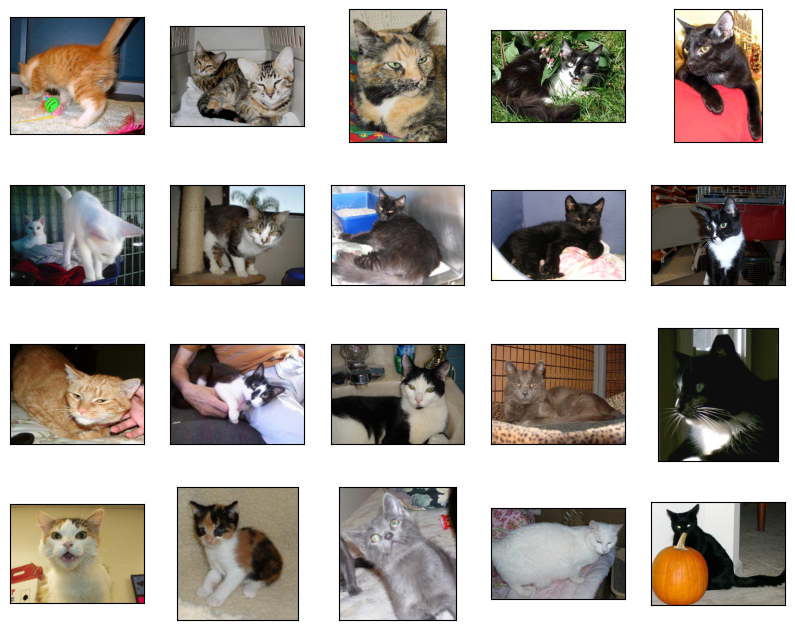

In [20]:
# prompt: plot 20 images from cat data

import matplotlib.pyplot as plt
import os

data_dir = "/content/data/PetImages/Cat"
images = os.listdir(data_dir)

plt.figure(figsize=(10, 10))
for i in range(20):
  plt.subplot(5, 5, i + 1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(plt.imread(os.path.join(data_dir, images[i])))
plt.show()


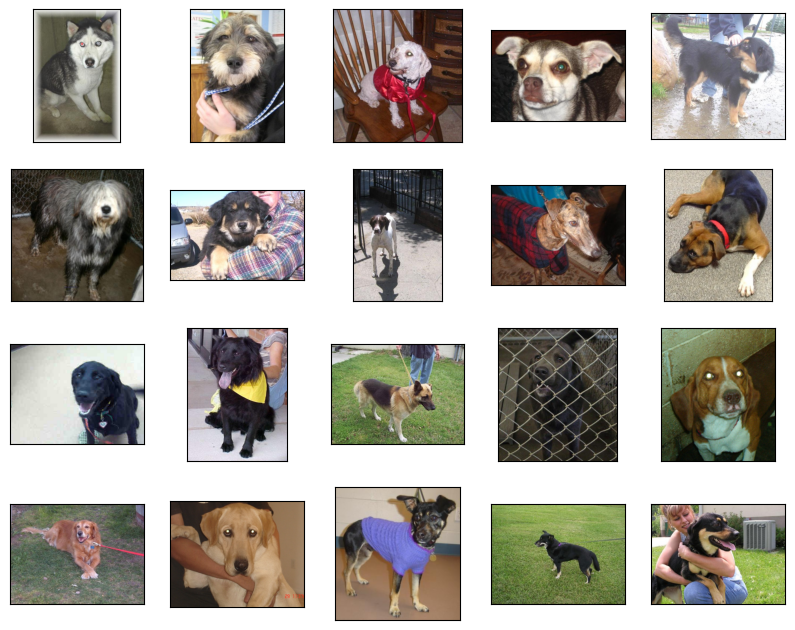

In [21]:
data_dir = "/content/data/PetImages/Dog"
images = os.listdir(data_dir)

plt.figure(figsize=(10, 10))
for i in range(20):
  plt.subplot(5, 5, i + 1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(plt.imread(os.path.join(data_dir, images[i])))
plt.show()

In [28]:
train_dir = "/content/data/dogs_vs_cats/train"
images = os.listdir(train_dir)
print(images)

['cats', 'dogs']


In [20]:
from keras.applications.vgg16 import VGG16


In [30]:
conv_base=VGG16(
    include_top=False,
    weights="imagenet",
    input_shape=(150,150,3)
)

In [34]:
model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

In [31]:
model=Sequential()
model.add(conv_base)
model.add(Flatten())
model.add(Dense(128,activation="relu"))
model.add(Dense(1,activation="sigmoid"))

In [42]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense_23 (Dense)            (None, 128)               1048704   
                                                                 
 dense_24 (Dense)            (None, 1)                 129       
                                                                 
Total params: 15763521 (60.13 MB)
Trainable params: 15763521 (60.13 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [43]:
train_ds=keras.utils.image_dataset_from_directory(
    directory="/content/data/train",
    labels="inferred",
    label_mode="int",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(150,150),
    shuffle=True,
)
test_ds=keras.utils.image_dataset_from_directory(
    directory="/content/data/test",
    labels="inferred",
    label_mode="int",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(150,150),
    shuffle=True,
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [44]:
def process(image,label):
  image=tf.cast(image/255. ,tf.float32)
  return image,label

In [45]:
train_ds=train_ds.map(process)
test_ds=test_ds.map(process)

In [46]:
model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])

In [47]:
history=model.fit(train_ds,epochs=5,validation_data=test_ds)

Epoch 1/5
625/625 [==============================] - 158s 222ms/step - loss: 0.7457 - accuracy: 0.4963 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/5
625/625 [==============================] - 138s 220ms/step - loss: 0.6932 - accuracy: 0.4999 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/5
625/625 [==============================] - 138s 220ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/5
625/625 [==============================] - 137s 219ms/step - loss: 0.6932 - accuracy: 0.4984 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 5/5
625/625 [==============================] - 138s 221ms/step - loss: 0.6932 - accuracy: 0.4999 - val_loss: 0.6932 - val_accuracy: 0.5000


In [32]:
from keras.preprocessing.image import ImageDataGenerator,img_to_array,array_to_img


In [33]:
train_data_gen=ImageDataGenerator(
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    rescale=1./255,
)

In [34]:
test_data_gen=ImageDataGenerator(
    rescale=1./255,
)

In [35]:
train_genrator=train_data_gen.flow_from_directory(
    directory="/content/data/train",
    target_size=(150,150),
    batch_size=32,
    class_mode="binary",
)
test_genrator=test_data_gen.flow_from_directory(
    directory="/content/data/test",
    target_size=(150,150),
    batch_size=32,
    class_mode="binary",
)

Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


In [36]:
model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])

In [ ]:
history=model.fit_generator(
    train_genrator,
    epochs=5,
    validation_data=test_genrator,
)